# O que vende um carro?

Na função de analista na Lista de Eixo de Manivela, estamos diante de um desafio empolgante. Nosso site recebe centenas de anúncios de veículos todos os dias, e agora temos a tarefa de realizar uma análise profunda dos dados acumulados ao longo dos últimos anos. Nosso objetivo é identificar os principais fatores que impactam o preço de um veículo, fornecendo insights valiosos para nossos usuários e contribuindo para uma experiência mais informada e eficiente no mercado automobilístico.

## Iniciação

In [1]:
# Carregando todas as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Carregue dados

In [2]:
# Carregando o arquivo com os dados em um DataFrame

try:
    df = pd.read_csv('vehicles_us.csv')
except:
    df = pd.read_csv('/datasets/vehicles_us.csv')

### Explorando os dados iniciais

O conjunto de dados contém os seguintes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel etc.
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada 
- `transmission`
- `paint_color`
- `is_4wd` — Se o veículo é 4 por 4 (tipo Booleano)
- `date_posted` — a data que a propaganda foi publicada
- `days_listed` — dias desde a publicação até a retirada

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


### Conclusões e próximos passos

De acordo com as infomações obtidas do dataframe, vemos alguns problemas em colunas como valores ausentes e tipos de dados errados. Sabendo disso, tentarei corrigí-los. 

MUDANDO O TIPO DE DADO DE `DATE_POSTED`

In [5]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


PREENCHENDO A COLUNA `ODOMETER`

In [6]:
df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [7]:
odometer_grouped = df.groupby(['model_year', 'condition'])['odometer'].median().to_dict()

def fill_odometer(row):
    if np.isnan(row['odometer']):
        return odometer_grouped.get((row['model_year'], row['condition']))
    return row['odometer']

df['odometer'] = df.apply(fill_odometer, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      50969 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


PREENCHENDO A COLUNA `MODEL_YEAR`

In [8]:
df['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [9]:
model_year_grouped = df.groupby(['model', 'condition'])['model_year'].median().to_dict()

def fill_model_year(row):
    if np.isnan(row['model_year']):
        return model_year_grouped.get((row['model'], row['condition']))
    return row['model_year']

df['model_year'] = df.apply(fill_model_year, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51519 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      50969 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


CORRIGINDO A COLUNA `TYPE`

In [10]:
df['type'].unique()

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

In [11]:
df['type'] = df['type'].str.lower()
df['type'].unique()

array(['suv', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

MUDANDO O TIPO DE DADO DE `IS_4WD`

In [12]:
df['is_4wd'].unique()

array([ 1., nan])

In [13]:
df['is_4wd'] = df['is_4wd'].where(df['is_4wd'] == 1, 0)
df['is_4wd'] = df['is_4wd'].astype('bool')
df['is_4wd'].unique()

array([ True, False])

PREENCHENDO A COLUNA `CYLINDER`

In [14]:
df['cylinders'].describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [15]:
cylinders_grouped = df.groupby('model')['cylinders'].median().to_dict()

def fill_cylinders(row):
    if np.isnan(row['cylinders']):
        return cylinders_grouped.get(row['model'])
    return row['cylinders']

df['cylinders'] = df.apply(fill_cylinders, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51519 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      50969 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 4.8+ MB


`model_year`, `odometer` e `paint_color` ainda possuem valores ausentes.

## Enriquecendo os dados

In [16]:
# Adicionando valores data/hora para quando a propaganda estiver colocada

df['weekday'] = df['date_posted'].dt.day_name()
df['month'] = df['date_posted'].dt.month_name()
df['year'] = df['date_posted'].dt.year
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,Saturday,June,2018
1,25500,2008.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019
3,1500,2003.0,ford f-150,fair,8.0,gas,193850.0,automatic,pickup,NaN,False,2019-03-22,9,Friday,March,2019
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019


In [17]:
# Adicionando a idade do veículo quando a propaganda for colocada

df['age_posted'] = df['year'] - df['model_year']
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,age_posted
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,Saturday,June,2018,7.0
1,25500,2008.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,10.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6.0
3,1500,2003.0,ford f-150,fair,8.0,gas,193850.0,automatic,pickup,NaN,False,2019-03-22,9,Friday,March,2019,16.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2.0


In [18]:
# Adicionando a quilometragem média por ano

df['avg_mileage_per_year'] = df['odometer'] / df['age_posted']
df['avg_mileage_per_year'] = df['avg_mileage_per_year'].fillna(0)

df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,age_posted,avg_mileage_per_year
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,Saturday,June,2018,7.0,20714.285714
1,25500,2008.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,10.0,8870.500000
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,fair,8.0,gas,193850.0,automatic,pickup,NaN,False,2019-03-22,9,Friday,March,2019,16.0,12115.625000
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2.0,40451.500000


In [19]:
# Isso deve ajudar a substituir os valores condicionais por alguma coisa que pode ser manipulada mais facilmente

df['condition'] = df['condition'].where(df['condition'] != 'salvage', 0 )
df['condition'] = df['condition'].where(df['condition'] != 'fair', 1 )
df['condition'] = df['condition'].where(df['condition'] != 'good', 2 )
df['condition'] = df['condition'].where(df['condition'] != 'excellent', 3)
df['condition'] = df['condition'].where(df['condition'] != 'like new', 4)
df['condition'] = df['condition'].where(df['condition'] != 'new', 5 )

df['condition'] = df['condition'].astype('int')
df['condition'].unique()

array([2, 4, 1, 3, 0, 5])

## Verificando os dados limpos

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   price                 51525 non-null  int64         
 1   model_year            51519 non-null  float64       
 2   model                 51525 non-null  object        
 3   condition             51525 non-null  int32         
 4   cylinders             51525 non-null  float64       
 5   fuel                  51525 non-null  object        
 6   odometer              50969 non-null  float64       
 7   transmission          51525 non-null  object        
 8   type                  51525 non-null  object        
 9   paint_color           42258 non-null  object        
 10  is_4wd                51525 non-null  bool          
 11  date_posted           51525 non-null  datetime64[ns]
 12  days_listed           51525 non-null  int64         
 13  weekday         

In [21]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,age_posted,avg_mileage_per_year
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,Saturday,June,2018,7.0,20714.285714
1,25500,2008.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,10.0,8870.500000
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,1,8.0,gas,193850.0,automatic,pickup,NaN,False,2019-03-22,9,Friday,March,2019,16.0,12115.625000
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2.0,40451.500000
5,14990,2014.0,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,Wednesday,June,2018,4.0,14488.500000
6,12990,2015.0,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,Thursday,December,2018,3.0,26404.000000
7,15990,2013.0,honda pilot,3,6.0,gas,109473.0,automatic,suv,black,True,2019-01-07,68,Monday,January,2019,6.0,18245.500000
8,11500,2012.0,kia sorento,3,4.0,gas,104174.0,automatic,suv,NaN,True,2018-07-16,19,Monday,July,2018,6.0,17362.333333
9,9200,2008.0,honda pilot,3,6.0,gas,147191.0,automatic,suv,blue,True,2019-02-15,17,Friday,February,2019,11.0,13381.000000


## Estudando os parâmetros fundamentais

Os parâmetros são:
- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição

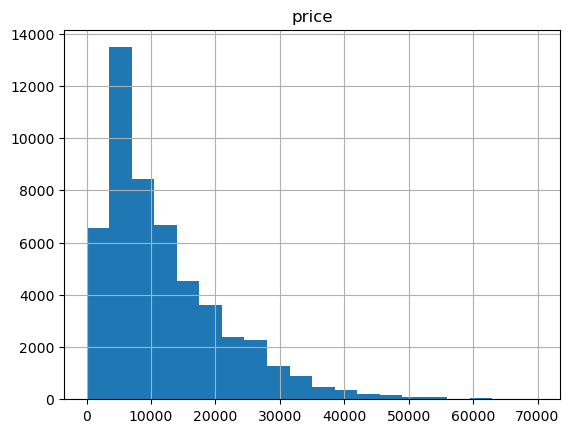

In [22]:
#PREÇO

df['price'].hist(bins=20, range=(0, 70000))
plt.title('price')
plt.show()

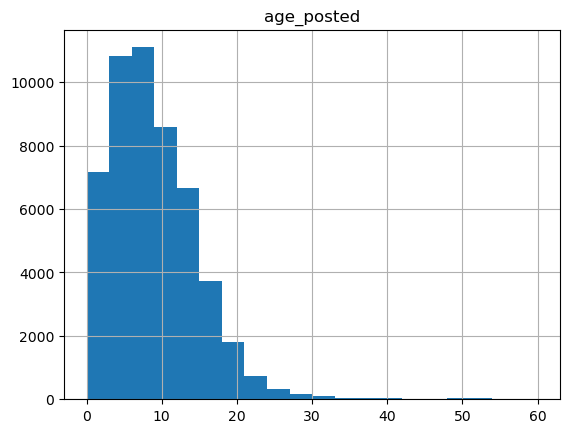

In [23]:
#IDADE DO VEÍCULO

df['age_posted'].hist(bins=20, range=(0, 60))
plt.title('age_posted')
plt.show()

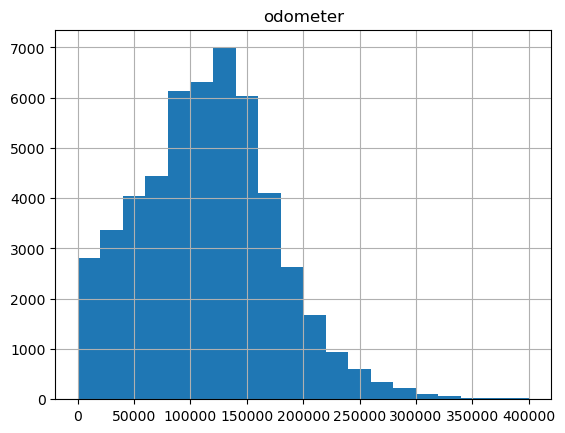

In [24]:
# QUILOMETRAGEM

df['odometer'].hist(bins=20, range=(0, 400000))
plt.title('odometer')
plt.show()

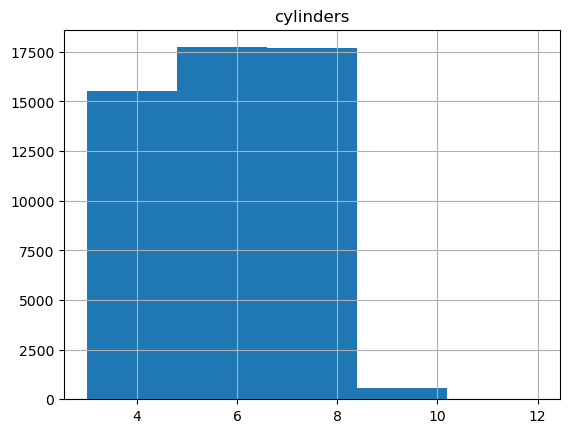

In [25]:
# NÚMERO DE CILINDROS

df['cylinders'].hist(bins=5)
plt.title('cylinders')
plt.show()

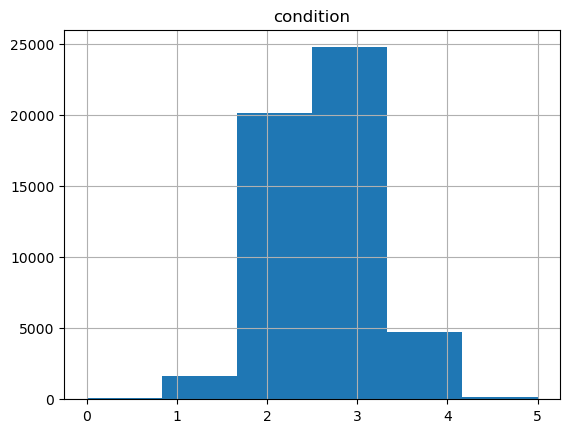

In [26]:
#CONDIÇÃO

df['condition'].hist(bins=6)
plt.title('condition')
plt.show()

No histograma `prices`, o gráfico começa a tender a zero e formar uma ampla base após 40000. No histograma `age_posted`, a mesma coisa acontece por volta dos 27 anos. Já no histograma `odometer`, começamos a notar uma cauda depois dos 250000. Não tem nenhum valor discrepante notável nos outros histogramas.

## Tratando os valores ausentes

In [27]:
# Definindo limites inferiores e superiores

def drop_outliers_IQR(df):

    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3-q1
    
    not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    outliers_dropped = not_outliers.dropna().reset_index()
    
    return outliers_dropped

In [28]:
# Armazenando os dados sem os valores atípicos em um DataFrame separado

no_categorical_data = df[['price', 'age_posted', 'odometer']]

numerical_data_not_outliers = drop_outliers_IQR(no_categorical_data)
filtered_data = df[df.index.isin(numerical_data_not_outliers['index'])]

filtered_data.info()
filtered_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48038 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   price                 48038 non-null  int64         
 1   model_year            48038 non-null  float64       
 2   model                 48038 non-null  object        
 3   condition             48038 non-null  int32         
 4   cylinders             48038 non-null  float64       
 5   fuel                  48038 non-null  object        
 6   odometer              48038 non-null  float64       
 7   transmission          48038 non-null  object        
 8   type                  48038 non-null  object        
 9   paint_color           39387 non-null  object        
 10  is_4wd                48038 non-null  bool          
 11  date_posted           48038 non-null  datetime64[ns]
 12  days_listed           48038 non-null  int64         
 13  weekday         

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,age_posted,avg_mileage_per_year
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,Saturday,June,2018,7.0,20714.285714
1,25500,2008.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,10.0,8870.500000
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,1,8.0,gas,193850.0,automatic,pickup,NaN,False,2019-03-22,9,Friday,March,2019,16.0,12115.625000
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2.0,40451.500000


## Parâmetros fundamentais sem valores atípicos

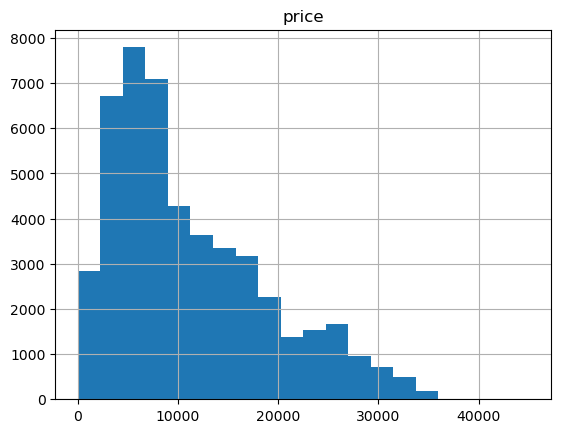

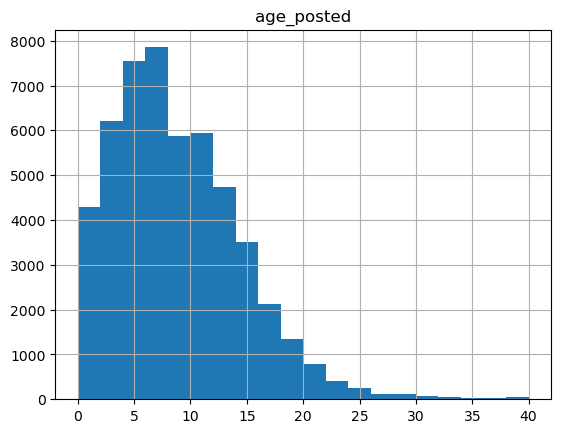

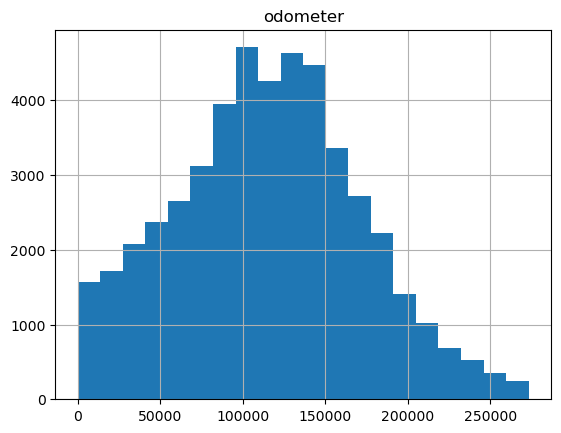

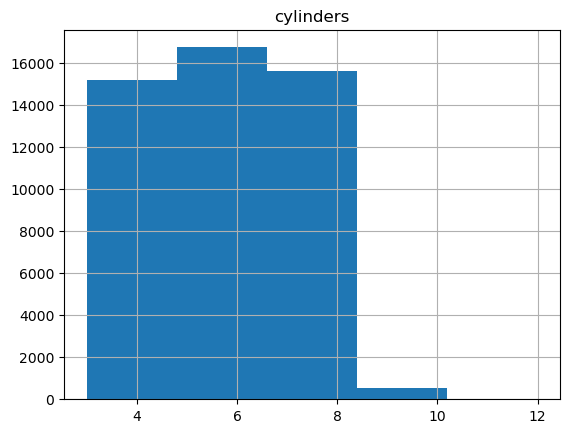

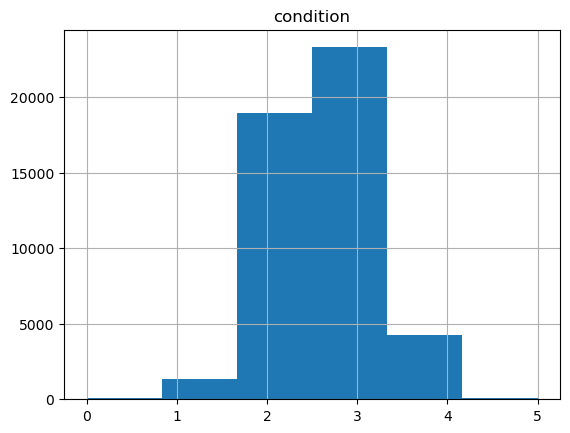

In [29]:
filtered_data['price'].hist(bins=20, range=(0, 45000))
plt.title('price')
plt.show()

df['age_posted'].hist(bins=20, range=(0, 40))
plt.title('age_posted')
plt.show()

filtered_data['odometer'].hist(bins=20)
plt.title('odometer')
plt.show()

filtered_data['cylinders'].hist(bins=5)
plt.title('cylinders')
plt.show()

filtered_data['condition'].hist(bins=6)
plt.title('condition')
plt.show()

No novo histograma `price`, o pico é atingido por volta dos 5000, em seguida há uma queda constante, embora haja um segundo pico menor em torno de 25000. O novo histograma `age_posted` atinge o pico em 5, seguido por uma queda constante, embora haja um segundo pico em 10. Em `odometer`, o pico está em torno de 125000 e o pico menor ocorre mais cedo em 100000. A principal diferença entre `price`, `age_posted` e `odometer` dos dados filtrados e do conjunto de dados original é que os histogramas mais recentes têm mais ruído, visto que lidam com um conjunto de valores mais limitado. Em contrapartida, observamos que as caudas sumiram, mas eles têm os mesmos picos.

## Tempo de vida das propagandas

In [30]:
filtered_data['days_listed'].describe()

count    48038.000000
mean        39.528144
std         28.201881
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

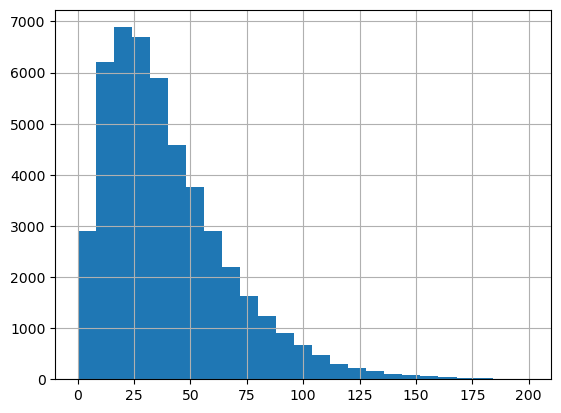

In [31]:
filtered_data['days_listed'].hist(bins=25, range=(0, 200))
plt.show()

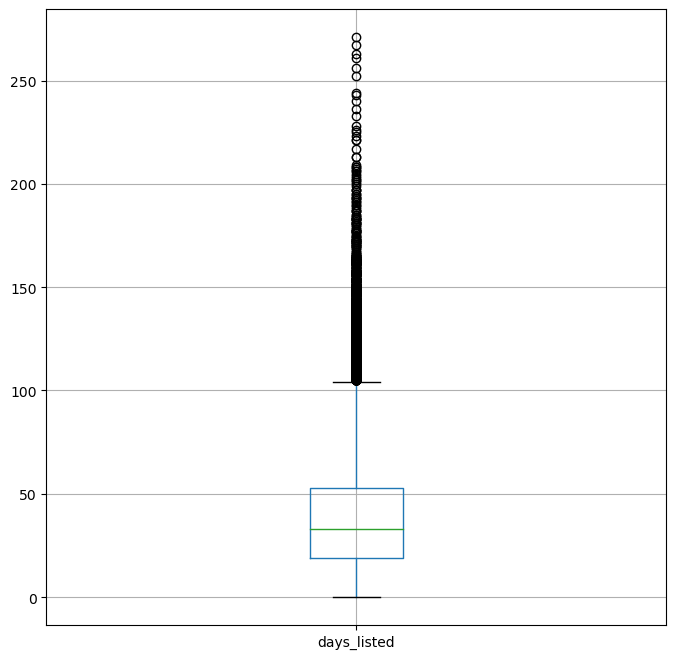

In [32]:
filtered_data.boxplot(column='days_listed', figsize=(8,8))
plt.show()

## Média de preços por cada tipo de veículo

In [33]:
type_price = filtered_data.pivot_table(index='type', values='price', aggfunc='median')
type_price

,price
type,
bus,10500.0
convertible,12500.0
coupe,12900.0
hatchback,5992.5
mini-van,6500.0
offroad,12500.0
other,8995.0
pickup,13995.0
sedan,5995.0


In [34]:
type_ads = filtered_data['type'].value_counts()
type_ads

sedan          11910
suv            11819
truck          11053
pickup          6259
coupe           2012
wagon           1489
mini-van        1131
hatchback       1000
van              579
convertible      346
other            235
offroad          182
bus               23
Name: type, dtype: int64

In [35]:
type_stat = type_price.join(type_ads)
type_stat.columns = ['price', 'ads']
type_stat = type_stat.sort_values('ads', ascending=False)
type_stat

,price,ads
type,,
sedan,5995.0,11910
suv,8750.0,11819
truck,14500.0,11053
pickup,13995.0,6259
coupe,12900.0,2012
wagon,7900.0,1489
mini-van,6500.0,1131
hatchback,5992.5,1000
van,7800.0,579


Os dois tipos mais populares nas propagandas são o sedan e o SUV.

## Fatores de preço

FATOR DE PREÇO NA CATEGORIA `SUV`

In [36]:
suv_data = filtered_data.query('type == "suv"')
suv_data = suv_data[['price', 'age_posted', 'odometer', 'condition', 'transmission', 'paint_color']]
suv_data = suv_data.reset_index(drop=True)
suv_data.head()

,price,age_posted,odometer,condition,transmission,paint_color
0,9400,7.0,145000.0,2,automatic,NaN
1,15990,6.0,109473.0,3,automatic,black
2,11500,6.0,104174.0,3,automatic,NaN
3,9200,11.0,147191.0,3,automatic,blue
4,12990,10.0,132285.0,3,automatic,black


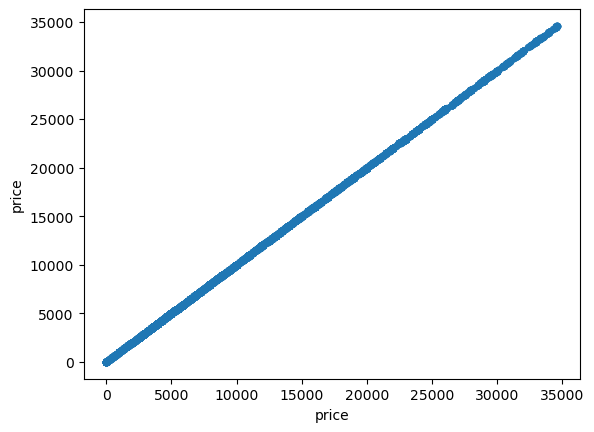

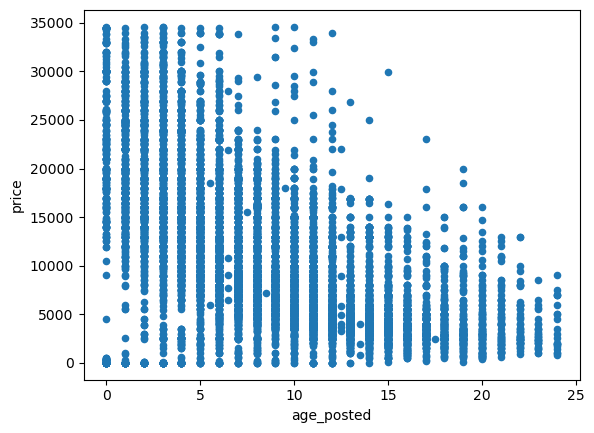

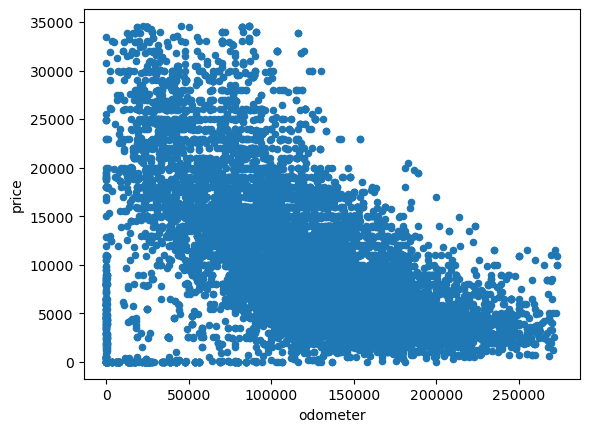

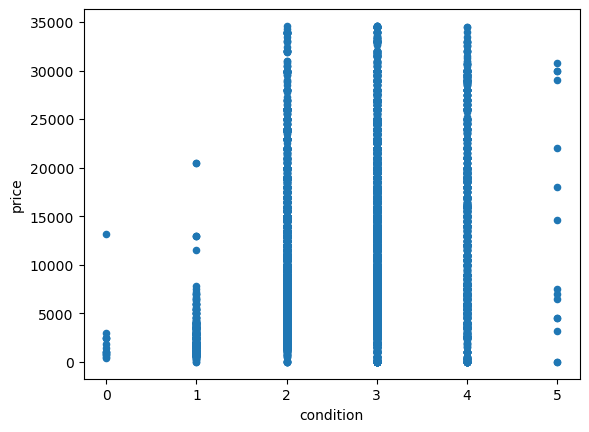

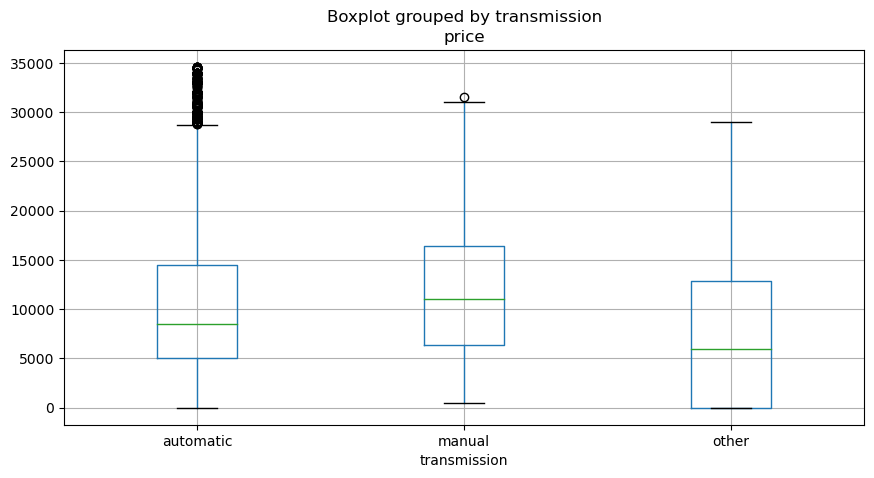

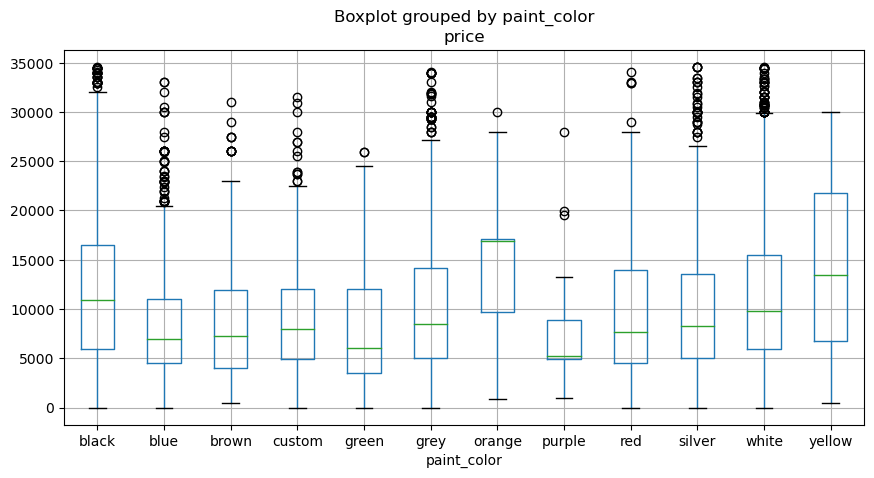

In [37]:
for column in suv_data:
    if (column == 'transmission') | (column == 'paint_color'):
        suv_data.boxplot('price', column, figsize=(10, 5))
        plt.show()
    else:
        suv_data.plot(column, 'price', 'scatter')
        plt.show()

In [38]:
suv_data.corr()

,price,age_posted,odometer,condition
price,1.000000,-0.582112,-0.525599,0.264397
age_posted,-0.582112,1.000000,0.630985,-0.333616
odometer,-0.525599,0.630985,1.000000,-0.341605
condition,0.264397,-0.333616,-0.341605,1.000000


Acima observamos que a idade é o fator que mais influencia o preço, seguido pelo odômetro. Já a condição tem uma fraca correlação. Nos boxplots, os SUVs amarelos e os com transmissão manual tem os valores mais altos das suas categorias.

FATOR DE PREÇO NA CATEGORIA `SEDAN`

In [39]:
sedan_data = filtered_data.query('type == "sedan"')
sedan_data = sedan_data[['price', 'age_posted', 'odometer', 'condition', 'transmission', 'paint_color']]
sedan_data = sedan_data.reset_index(drop=True)
sedan_data.head()

,price,age_posted,odometer,condition,transmission,paint_color
0,5500,6.0,110000.0,4,automatic,red
1,14900,2.0,80903.0,3,automatic,black
2,14990,4.0,57954.0,3,automatic,black
3,12990,3.0,79212.0,3,automatic,white
4,8990,7.0,111142.0,3,automatic,grey


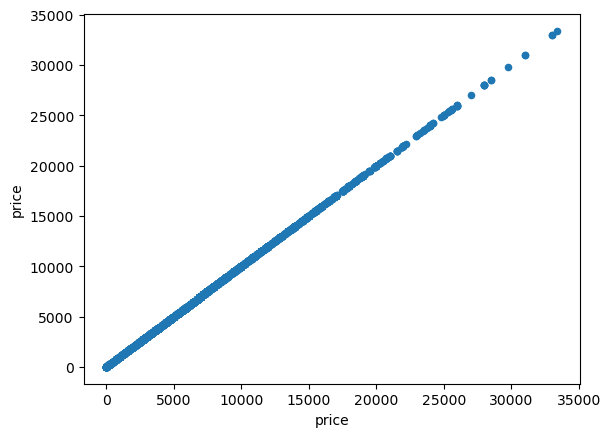

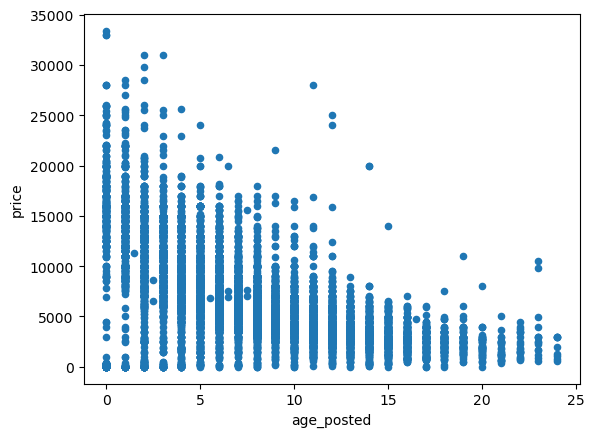

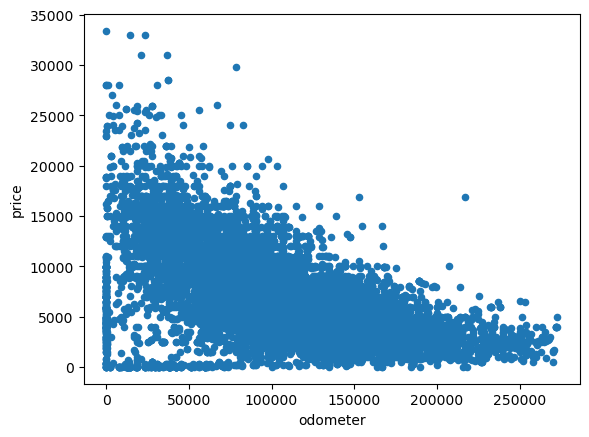

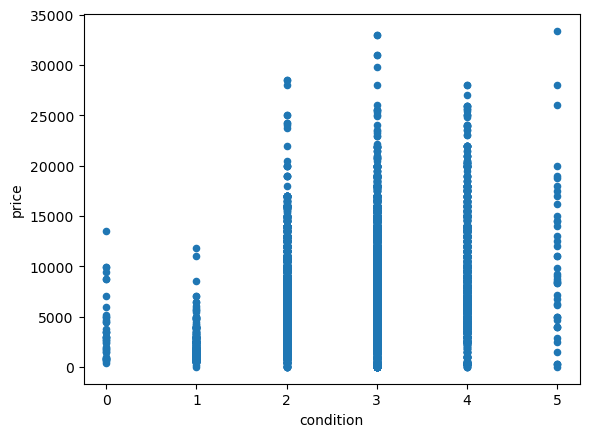

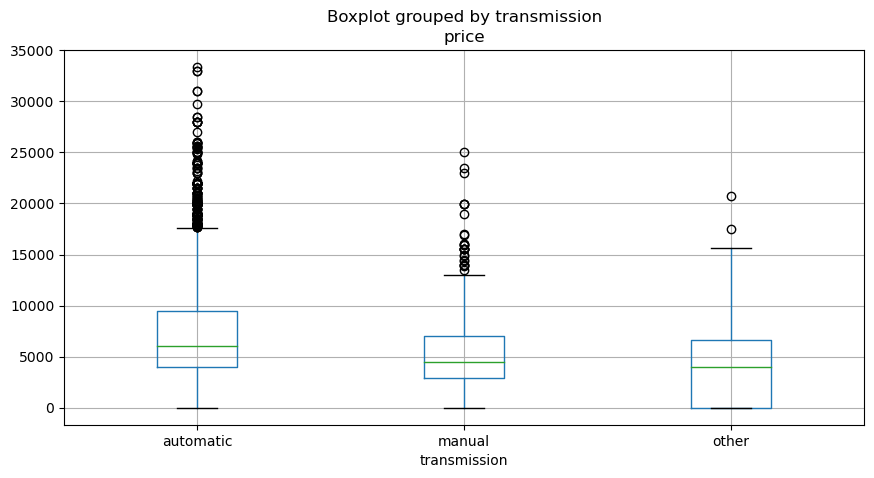

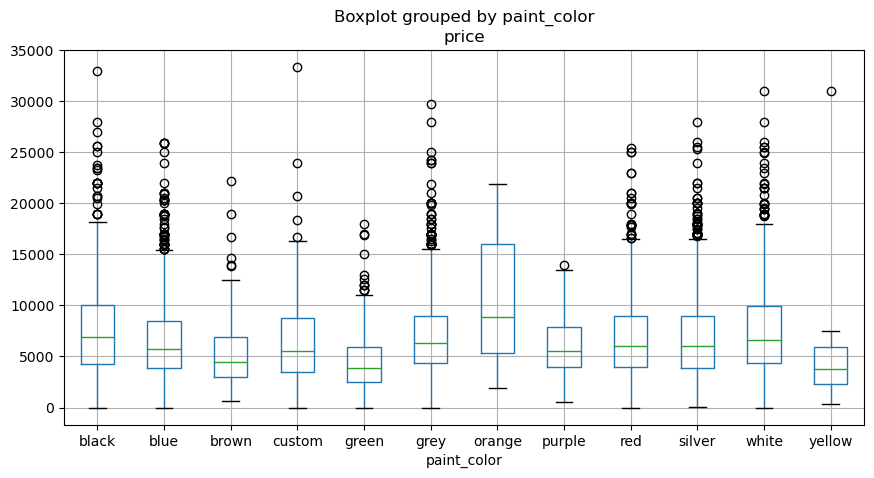

In [40]:
for column in sedan_data:
    if (column == 'transmission') | (column == 'paint_color'):
        sedan_data.boxplot('price', column, figsize=(10, 5))
        plt.show()
    else:
        sedan_data.plot(column, 'price', 'scatter')
        plt.show()

In [41]:
sedan_data.corr()

,price,age_posted,odometer,condition
price,1.000000,-0.621847,-0.565304,0.293926
age_posted,-0.621847,1.000000,0.625706,-0.316410
odometer,-0.565304,0.625706,1.000000,-0.340948
condition,0.293926,-0.316410,-0.340948,1.000000


Podemos ver que o fator mais dependente do preço é a idade seguido pelo velocímetro. A condição em geral não tem nenhuma relação de dependencia forte com nenhum dos outros fatores. Nos gráficos de caixa a cor laranja e a transmissão automática têm os valores mais altos de suas categorias.

## Conclusão geral

Podemos concluir com base nos dados que um anúncio dura entre 19 e 50 dias, e os que duram mais de 100 dias são anormalmente longos. Com os dois tipos de veículos com o maior número de anúncios chegamos à conclusão que o fator que mais impacta o preço é a idade, depois a quilometragem. Notamos também que para SUVs, o amarelo era a cor com os preços mais altos e a transmissão manual superando a transmissão automática nos preços. Para a categoria sedan, sendo a segunda mais popular, laranja foi a cor que elevou os preços, e a transmissão automática foi mais popular que a transmissão manual. Durante o processo, foi decidido que não seria necessario excluir os valores ausentes visto que não interferiria significativamente no resultado final, e que, o método `corr()` exclui os mesmos.